In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
imdb_df  = pd.read_csv('../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
imdb_df.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [5]:
#drop null values rows

imdb_df.dropna(axis= 0, inplace = True)


In [6]:
imdb_df.Gross = imdb_df.Gross.apply(lambda x : str(x).replace(',',''))

<Figure size 2520x1080 with 0 Axes>

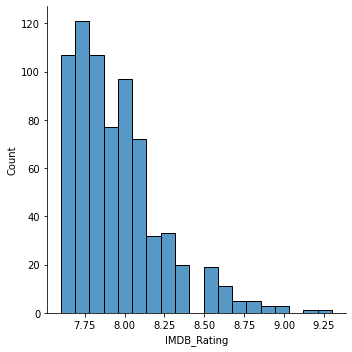

In [7]:
plt.figure(figsize = (35,15))

sns.displot(data = imdb_df, x = 'IMDB_Rating')

In [8]:
imdb_df.Gross = imdb_df.Gross.apply(lambda x : str(x).replace(',',''))

In [9]:
imdb_df.Gross = imdb_df.Gross.astype('float64')

In [10]:
imdb_df.Gross.dtypes

dtype('float64')

<AxesSubplot:xlabel='Genre', ylabel='Gross'>

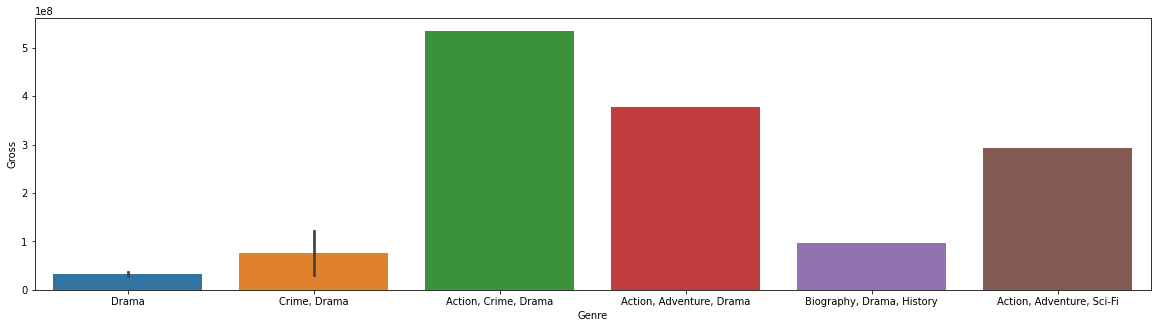

In [11]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Genre', y = 'Gross', data = imdb_df.head(10))


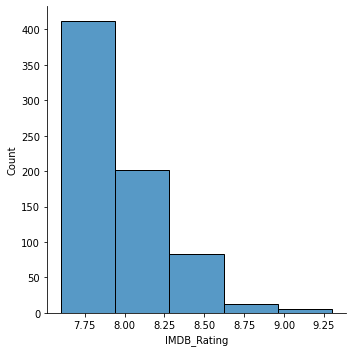

In [12]:
sns.displot(x = 'IMDB_Rating', data = imdb_df, bins  = 5)

In [13]:
imdb_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,714.000000,714.000000,7.140000e+02,7.140000e+02
mean,7.937115,77.158263,3.561348e+05,7.851359e+07
std,0.293278,12.401144,3.539011e+05,1.149780e+08
min,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,7.700000,70.000000,9.600975e+04,6.157408e+06
50%,7.900000,78.000000,2.366025e+05,3.485015e+07
75%,8.100000,86.000000,5.077922e+05,1.024641e+08
max,9.300000,100.000000,2.343110e+06,9.366622e+08


<AxesSubplot:xlabel='Released_Year', ylabel='Gross'>

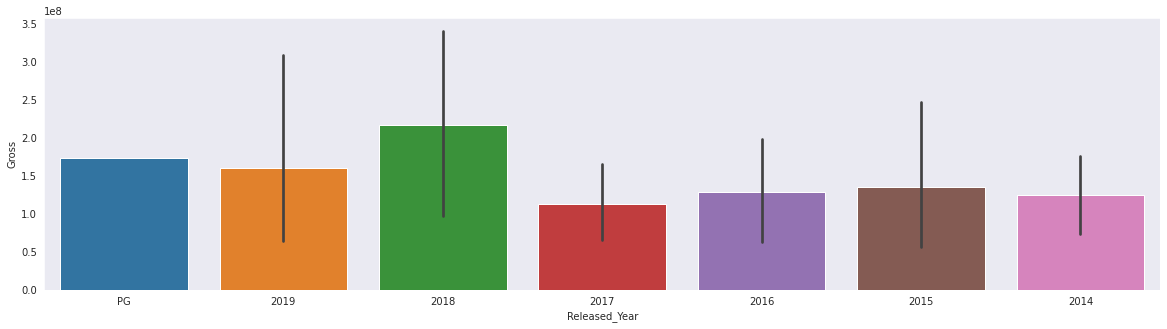

In [14]:
sns.set_style('dark')
plt.figure(figsize = (20,5))
sns.barplot(x = 'Released_Year', y = 'Gross', data = imdb_df.sort_values('Released_Year',ascending=False).head(100))

In [15]:
#top 10 highest grossing

In [16]:
imdb_df.Released_Year.dtype

dtype('O')

In [17]:
imdb_df[imdb_df.Released_Year=='2010'].sort_values(by = 'Gross', ascending = False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
151,https://m.media-amazon.com/images/M/MV5BMTgxOT...,Toy Story 3,2010,U,103 min,"Animation, Adventure, Comedy",8.2,The toys are mistakenly delivered to a day-car...,92.0,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,415004880.0
755,https://m.media-amazon.com/images/M/MV5BMTQ2OT...,Harry Potter and the Deathly Hallows: Part 1,2010,A,146 min,"Adventure, Family, Fantasy",7.7,"As Harry, Ron, and Hermione race against time ...",65.0,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Bill Nighy,479120,295983305.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
906,https://m.media-amazon.com/images/M/MV5BMTY3Nj...,Despicable Me,2010,U,95 min,"Animation, Comedy, Crime",7.6,When a criminal mastermind uses a trio of orph...,72.0,Pierre Coffin,Chris Renaud,Steve Carell,Jason Segel,Russell Brand,500851,251513985.0
230,https://m.media-amazon.com/images/M/MV5BMjA5ND...,How to Train Your Dragon,2010,U,98 min,"Animation, Action, Adventure",8.1,A hapless young Viking who aspires to hunt dra...,75.0,Dean DeBlois,Chris Sanders,Jay Baruchel,Gerard Butler,Christopher Mintz-Plasse,666773,217581231.0
771,https://m.media-amazon.com/images/M/MV5BMTAxND...,Tangled,2010,U,100 min,"Animation, Adventure, Comedy",7.7,The magically long-haired Rapunzel has spent h...,71.0,Nathan Greno,Byron Howard,Mandy Moore,Zachary Levi,Donna Murphy,405922,200821936.0
904,https://m.media-amazon.com/images/M/MV5BODhkZD...,True Grit,2010,PG-13,110 min,"Drama, Western",7.6,A stubborn teenager enlists the help of a toug...,80.0,Ethan Coen,Joel Coen,Jeff Bridges,Matt Damon,Hailee Steinfeld,311822,171243005.0
346,https://m.media-amazon.com/images/M/MV5BMzU5Mj...,The King's Speech,2010,U,118 min,"Biography, Drama, History",8.0,"The story of King George VI, his impromptu asc...",88.0,Tom Hooper,Colin Firth,Geoffrey Rush,Helena Bonham Carter,Derek Jacobi,639603,138797449.0
145,https://m.media-amazon.com/images/M/MV5BYzhiND...,Shutter Island,2010,A,138 min,"Mystery, Thriller",8.2,"In 1954, a U.S. Marshal investigates the disap...",63.0,Martin Scorsese,Leonardo DiCaprio,Emily Mortimer,Mark Ruffalo,Ben Kingsley,1129894,128012934.0
355,https://m.media-amazon.com/images/M/MV5BNzY2Nz...,Black Swan,2010,A,108 min,"Drama, Thriller",8.0,A committed dancer struggles to maintain her s...,79.0,Darren Aronofsky,Natalie Portman,Mila Kunis,Vincent Cassel,Winona Ryder,699673,106954678.0


<AxesSubplot:xlabel='Series_Title', ylabel='Gross'>

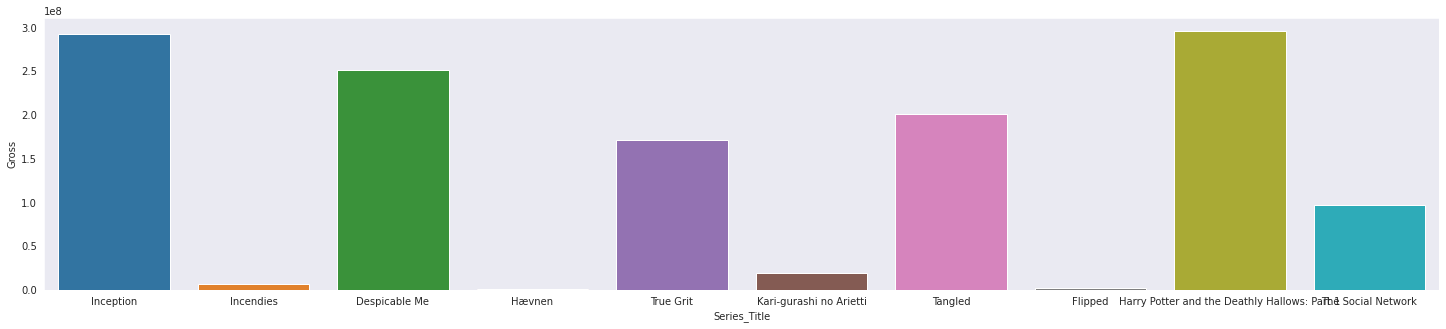

In [18]:
plt.figure(figsize=(25,5))  #Top movies in 2010
sns.barplot(x = 'Series_Title', y = 'Gross', data = imdb_df[imdb_df.Released_Year == '2010'].sort_values('Released_Year',ascending=False).head(10))

<AxesSubplot:xlabel='Series_Title', ylabel='Gross'>

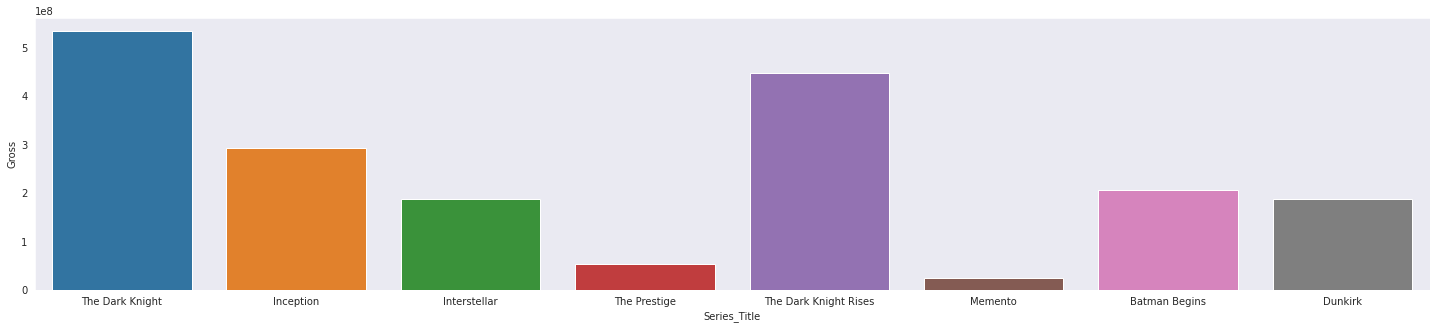

In [19]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'Series_Title', y = 'Gross', data = imdb_df[imdb_df.Director == 'Christopher Nolan'])

<AxesSubplot:xlabel='Director', ylabel='Gross'>

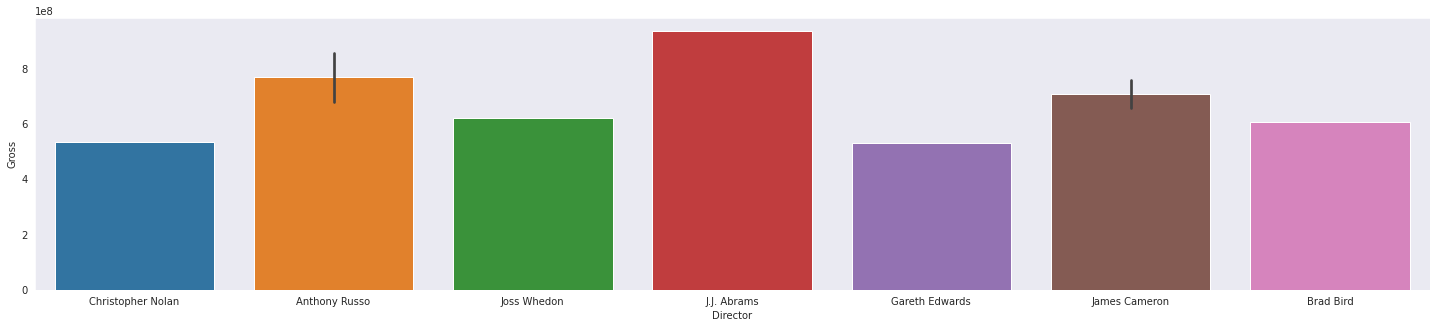

In [20]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'Director', y = 'Gross', data = imdb_df[imdb_df.Gross > 500000000])

<AxesSubplot:xlabel='Director', ylabel='Gross'>

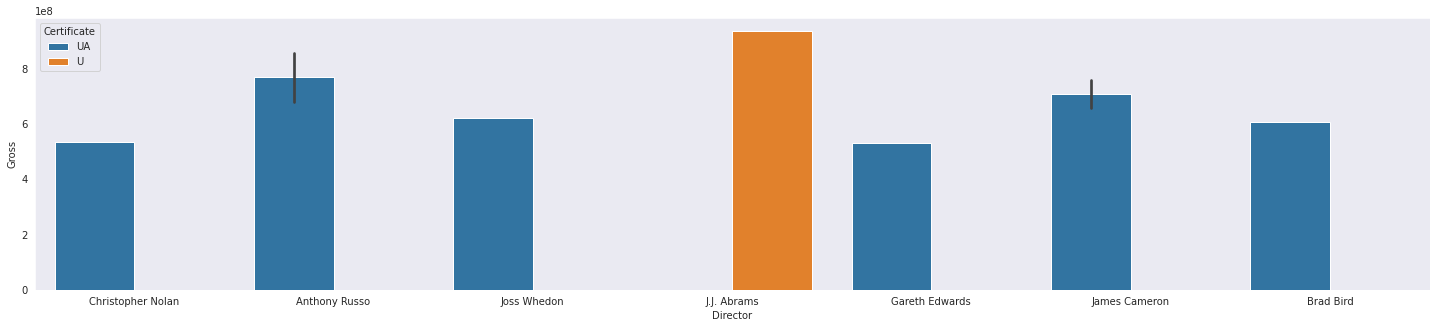

In [21]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'Director', y = 'Gross', data = imdb_df[imdb_df.Gross > 500000000],hue = 'Certificate')

<AxesSubplot:xlabel='Certificate', ylabel='Gross'>

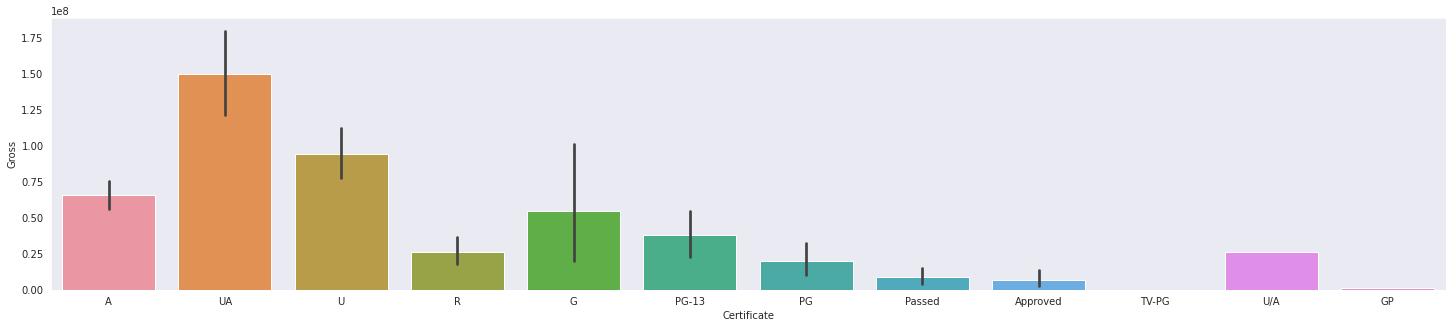

In [22]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'Certificate', y = 'Gross', data = imdb_df)  # UA cerificate movies have significant gross revenues

<AxesSubplot:>

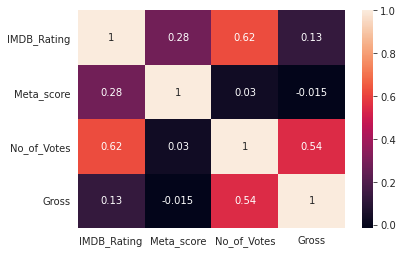

In [23]:
sns.heatmap(imdb_df.corr(),annot = True)